## GEOPLANAR

This notebook is intented to apply geoplanar on the 1930's HOLC morgage map data. A subset of data is obtained from Oakland to study and test the functionality of the package.

`geoplanar`, is a package for [planar enforcement](https://ibis.geog.ubc.ca/courses/klink/gis.notes/ncgia/u12.html#SEC12.6) for polygon (multipolygon) [GeoSeries/GeoDataFrames](https://github.com/geopandas/geopandas).


In [1]:
import geoplanar
import geopandas

/Users/noraizasif/opt/anaconda3/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
j = geopandas.read_file("fullDownload.geojson")

In [3]:
j.head()

,state,city,name,holc_id,holc_grade,area_description_data,geometry
0,AL,Birmingham,Mountain Brook Estates and Country Club Garden...,A1,A,{'5': 'Both sales and rental prices in 1929 we...,"MULTIPOLYGON (((-86.75678 33.49754, -86.75692 ..."
1,AL,Birmingham,"Redmont Park, Rockridge Park, Warwick Manor, a...",A2,A,{'5': 'Both sales and rental prices in 1929 we...,"MULTIPOLYGON (((-86.75867 33.50933, -86.76093 ..."
2,AL,Birmingham,"Colonial Hills, Pine Crest (outside city limits)",A3,A,"{'5': 'Generally speaking, houses are not buil...","MULTIPOLYGON (((-86.75678 33.49754, -86.75196 ..."
3,AL,Birmingham,"Grove Park, Hollywood, Mayfair, and Edgewood s...",B1,B,{'5': 'Both sales and rental prices in 1929 we...,"MULTIPOLYGON (((-86.80111 33.48071, -86.80099 ..."
4,AL,Birmingham,Best section of Woodlawn Highlands,B10,B,{'5': 'Both sales and rental prices in 1929 we...,"MULTIPOLYGON (((-86.74923 33.53332, -86.74916 ..."


In [4]:
j.shape

(7502, 7)

In [5]:
len(j.city.unique())

148

In [6]:
j.groupby(by='holc_grade').count()

,state,city,name,holc_id,area_description_data,geometry
holc_grade,,,,,,
A,819,819,233,813,819,819
B,1950,1950,443,1935,1950,1950
C,2960,2960,544,2943,2960,2960
D,1771,1771,296,1750,1771,1771
E,2,2,0,2,2,2


In [7]:
# subset data for California
ca = j[j.state=='CA']

In [8]:
ca.head()

,state,city,name,holc_id,holc_grade,area_description_data,geometry
114,CA,Fresno,None,A1,A,{'1': 'This is the best residential district i...,"MULTIPOLYGON (((-119.80871 36.77829, -119.8026..."
115,CA,Fresno,None,A2,A,{'1': 'This small area stands out definitely f...,"MULTIPOLYGON (((-119.80451 36.76402, -119.8011..."
116,CA,Fresno,None,B1,B,{'1': 'This is an area comprised entirely of n...,"MULTIPOLYGON (((-119.80355 36.78662, -119.8016..."
117,CA,Fresno,None,B2,B,{'1': 'This area is a very good residential di...,"MULTIPOLYGON (((-119.80111 36.77551, -119.8010..."
118,CA,Fresno,None,B3,B,{'1': 'This area is a comparatively new sub-di...,"MULTIPOLYGON (((-119.74693 36.74631, -119.7423..."


In [9]:
ca.city.unique()

array(['Fresno', 'Los Angeles', 'Oakland', 'Sacramento', 'San Diego',
       'San Francisco', 'San Jose', 'Stockton'], dtype=object)

Subsetting for Oakland to study any potential cartographic issues in the digitalized HOLC maps from 1930.

In [10]:
oak = j[j.city=='Oakland']

In [11]:
oak.head()

,state,city,name,holc_id,holc_grade,area_description_data,geometry
554,CA,Oakland,None,A,A,{'': ''},"MULTIPOLYGON (((-122.20252 37.81099, -122.2023..."
555,CA,Oakland,None,A1,A,"{'1': 'A-1 Green Berkeley', '2': 'Characterize...","MULTIPOLYGON (((-122.26319 37.90040, -122.2618..."
556,CA,Oakland,None,A10,A,"{'1': 'Low Green A-10 Oakland', '2': 'Rolling'...","MULTIPOLYGON (((-122.23403 37.80671, -122.2343..."
557,CA,Oakland,None,A11,A,"{'1': 'Oakland, California Green A-11', '2': '...","MULTIPOLYGON (((-122.20252 37.81099, -122.2033..."
558,CA,Oakland,None,A2,A,"{'1': 'Berkeley A-2 Green', '2': 'Hilly, with ...","MULTIPOLYGON (((-122.27847 37.89710, -122.2785..."


In [12]:
oak.shape

(119, 7)

In [13]:
oak.groupby(by='holc_grade').count()

,state,city,name,holc_id,area_description_data,geometry
holc_grade,,,,,,
A,12,12,0,12,12,12
B,46,46,0,46,46,46
C,41,41,0,41,41,41
D,20,20,0,20,20,20


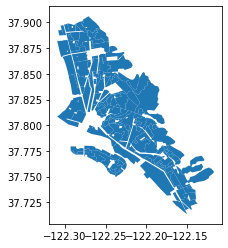

In [14]:
oak.plot()

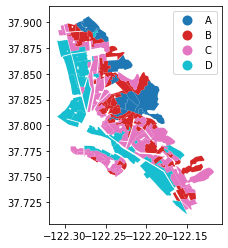

In [15]:
oak.plot(column='holc_grade', categorical=True, legend=True)

In [16]:
import contextily as ctx

In [17]:
oak = oak.to_crs(epsg=3857)

In [18]:
%time img, ext = ctx.bounds2img(*oak.total_bounds,12)

CPU times: user 293 ms, sys: 56.8 ms, total: 350 ms
Wall time: 2.59 s


In [19]:
ext

(-13619243.951739563,
 -13589892.132878058,
 4529964.044292685,
 4569099.802774696)

In [20]:
import matplotlib.pyplot as plt

In [21]:
from matplotlib.colors import ListedColormap

In [22]:
ctx.providers.keys()

dict_keys(['OpenStreetMap', 'OpenSeaMap', 'OpenPtMap', 'OpenTopoMap', 'OpenRailwayMap', 'OpenFireMap', 'SafeCast', 'Thunderforest', 'OpenMapSurfer', 'Hydda', 'MapBox', 'Stamen', 'Esri', 'OpenWeatherMap', 'HERE', 'FreeMapSK', 'MtbMap', 'CartoDB', 'HikeBike', 'BasemapAT', 'nlmaps', 'NASAGIBS', 'NLS', 'JusticeMap', 'Wikimedia', 'GeoportailFrance', 'OneMapSG'])

In [23]:
ctx.providers.Stamen.TonerLite

{'url': 'https://stamen-tiles-{s}.a.ssl.fastly.net/{variant}/{z}/{x}/{y}{r}.{ext}',
 'attribution': 'Map tiles by Stamen Design, CC BY 3.0 -- Map data (C) OpenStreetMap contributors',
 'subdomains': 'abcd',
 'min_zoom': 0,
 'max_zoom': 20,
 'variant': 'toner-lite',
 'ext': 'png',
 'name': 'Stamen.TonerLite'}

In [24]:
code_colors = ['darkgreen', 'steelblue', 'yellow', 'firebrick']

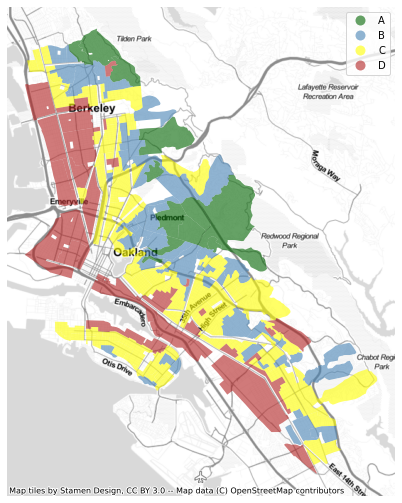

In [25]:
f, ax = plt.subplots(1, figsize=(9, 9))
# Display tile map
#ax.imshow(img, extent=ext)
# Display airports on top
#ax.scatter(air.x, air.y, c='purple', s=2)
# Remove axis
oak.plot(ax=ax, column='holc_grade', categorical=True, legend=True, alpha=.6,
            cmap=ListedColormap(code_colors))
ctx.add_basemap(ax, crs=oak.crs.to_string(),
               source = ctx.providers.Stamen.TonerLite)
ax.set_axis_off()
# Add title
plt.show()

## Applying GEOPLANAR

### 1. Checking for overlaps 
Planar Enforcement Violation: One polygon overlapping another polygon

In [26]:
geoplanar.is_overlapping(oak)

False

### 2. Slivers

In [27]:
oak_holes = geoplanar.holes(oak)
oak_holes.total_bounds

array([-13614136.50218248,   4540859.18674217, -13597163.9533797 ,
         4564899.95707009])

In [28]:
oak_holes.shape

(27, 3)

### 3. Checking for Planar Enforcement Violation: non-planar enforced edges

### Detecting nonplanar edges

In [29]:
geoplanar.non_planar_edges(oak)

/Users/noraizasif/opt/anaconda3/lib/python3.8/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 6 disconnected components.
 There are 2 islands with ids: 47, 109.
  warnings.warn(message)


defaultdict(set, {})

In [30]:
import libpysal
w = libpysal.weights.Queen.from_dataframe(oak)
w.neighbors

{0: [16, 3, 26, 8, 10, 27, 15],
 1: [5, 99, 4, 53],
 2: [24, 25, 27],
 3: [0, 26],
 4: [1, 45, 12, 53],
 5: [1, 99, 53, 94],
 6: [56, 14, 55],
 7: [14, 15],
 8: [0, 17, 9, 10, 15],
 9: [17, 18, 8, 10, 11, 15],
 10: [0, 27, 8, 9, 11, 25],
 11: [18, 22, 9, 10, 25],
 12: [4, 23],
 13: [98],
 14: [6, 7, 56, 57, 59, 15],
 15: [0, 65, 7, 8, 9, 14, 16, 17],
 16: [0, 65, 15],
 17: [18, 19, 20, 8, 9, 62, 15],
 18: [17, 20, 22, 9, 11],
 19: [17, 20, 62],
 20: [17, 18, 19, 21, 22, 62, 63],
 21: [64, 20, 63],
 22: [18, 11, 20],
 23: [58, 12],
 24: [64, 25, 2, 66],
 25: [64, 2, 24, 27, 10, 11],
 26: [0, 27, 3, 71],
 27: [0, 2, 66, 68, 102, 10, 25, 26, 28, 29],
 28: [27, 68, 102],
 29: [27, 68, 102],
 30: [71],
 31: [72, 71],
 32: [33, 74, 71],
 33: [32, 35, 71, 74, 75],
 34: [80, 58, 45, 54],
 35: [33, 75],
 36: [73, 75, 37],
 37: [36, 38, 107, 77, 78],
 38: [107, 77, 37, 78],
 39: [108, 78, 76],
 40: [81, 108, 78],
 41: [81, 78, 79],
 42: [77],
 43: [79],
 44: [81, 46],
 45: [80, 34, 4, 53, 54, 91

In [41]:
oak1= geoplanar.fix_npe_edges(oak) 
oak1.head()

/Users/noraizasif/opt/anaconda3/lib/python3.8/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 6 disconnected components.
 There are 2 islands with ids: 47, 109.
  warnings.warn(message)


,state,city,name,holc_id,holc_grade,area_description_data,geometry
554,CA,Oakland,None,A,A,{'': ''},"MULTIPOLYGON (((-13603522.523 4552758.777, -13..."
555,CA,Oakland,None,A1,A,"{'1': 'A-1 Green Berkeley', '2': 'Characterize...","MULTIPOLYGON (((-13610276.499 4565364.507, -13..."
556,CA,Oakland,None,A10,A,"{'1': 'Low Green A-10 Oakland', '2': 'Rolling'...","MULTIPOLYGON (((-13607029.977 4552156.288, -13..."
557,CA,Oakland,None,A11,A,"{'1': 'Oakland, California Green A-11', '2': '...","MULTIPOLYGON (((-13603522.523 4552758.777, -13..."
558,CA,Oakland,None,A2,A,"{'1': 'Berkeley A-2 Green', '2': 'Hilly, with ...","MULTIPOLYGON (((-13611977.127 4564899.957, -13..."


In [43]:
geoplanar.is_planar_enforced(oak1)

False

**Note: Some of the polygons are not Queen neighbors, since a necessary (and sufficient) condition for the latter is at least one shared vertex. Hence even when we apply the fix_npe_edges commands the outcome still comes out as false.**

### 4. Missing interior rings (aka holes)

In [44]:
mi = geoplanar.missing_interiors(oak)
mi

[]

**NOTE: Application of GEOPLANAR does not reveal any planar enforcement violations.**

In [45]:
# Further investigation of slivers, why are there missing areas on map that were not color coded.

### Subset for Grade D

In [46]:
oak.groupby(by='holc_grade').count()
# There are 20 areas that are marked as D.

,state,city,name,holc_id,area_description_data,geometry
holc_grade,,,,,,
A,12,12,0,12,12,12
B,46,46,0,46,46,46
C,41,41,0,41,41,41
D,20,20,0,20,20,20


In [47]:
oak_D = oak[oak.holc_grade=='D']

In [48]:
oak_D.head()

,state,city,name,holc_id,holc_grade,area_description_data,geometry
653,CA,Oakland,None,D1,D,"{'1': 'Red (slide) Berkeley, California D-1', ...","MULTIPOLYGON (((-13610578.620 4563899.546, -13..."
654,CA,Oakland,None,D10,D,"{'1': 'D-10 Red Oakland, California', '2': 'Le...","MULTIPOLYGON (((-13606819.806 4549108.733, -13..."
655,CA,Oakland,None,D11,D,"{'1': 'Red D-11 Oakland, California', '2': 'Le...","MULTIPOLYGON (((-13610979.704 4551242.478, -13..."
656,CA,Oakland,None,D12,D,"{'1': 'Oakland, California D-12 Red (slide)', ...","MULTIPOLYGON (((-13605485.976 4550478.635, -13..."
657,CA,Oakland,None,D13,D,"{'1': 'Red (slide) D-13 Oakland, California', ...","MULTIPOLYGON (((-13604884.739 4548908.299, -13..."


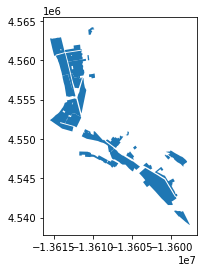

In [49]:
oak_D.plot()


In [50]:
geoplanar.is_overlapping(oak)

False

In [51]:
oak_D_holes = geoplanar.holes(oak_D)
oak_D_holes.shape

(7, 3)

In [52]:
oak_D_holes.total_bounds

array([-13614136.50218248,   4550795.60458874, -13610505.81699025,
         4561450.27049705])

In [53]:
oak_D.area.sum()

54309584.317545995

In [61]:
geoplanar.non_planar_edges(oak_D)

/Users/noraizasif/opt/anaconda3/lib/python3.8/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 14 disconnected components.
 There are 11 islands with ids: 0, 1, 3, 4, 5, 7, 8, 9, 10, 12, 15.
  warnings.warn(message)


defaultdict(set, {})

In [62]:
geoplanar.is_planar_enforced(oak_D)

False

### Subset Data for D3

In [54]:
oak_D3 = oak_D[oak_D.holc_id=='D3']

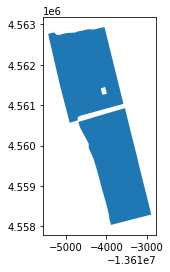

In [55]:
oak_D3.plot()

In [56]:
oak_D3.geometry.area
# Area with hole

666    5.745985e+06
dtype: float64

In [57]:
oak_D3_holes = geoplanar.holes(oak_D3)
oak_D3_holes.shape

(1, 3)

In [63]:
geoplanar.is_planar_enforced(oak_D3)

False

In [64]:
wD3 = libpysal.weights.Queen.from_dataframe(oak_D3)
wD3.neighbors

{0: []}

In [65]:
gdf = geoplanar.fix_npe_edges(oak_D3)

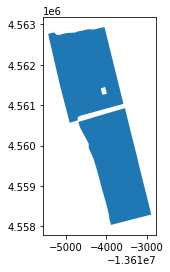

In [66]:
gdf.plot()

In [58]:
%time img, ext = ctx.bounds2img(*oak_D3.total_bounds,12)

CPU times: user 3.26 ms, sys: 2.37 ms, total: 5.63 ms
Wall time: 57.6 ms


In [59]:
ext

(-13619243.951739563,
 -13609460.012119062,
 4549531.923533689,
 4569099.802774696)

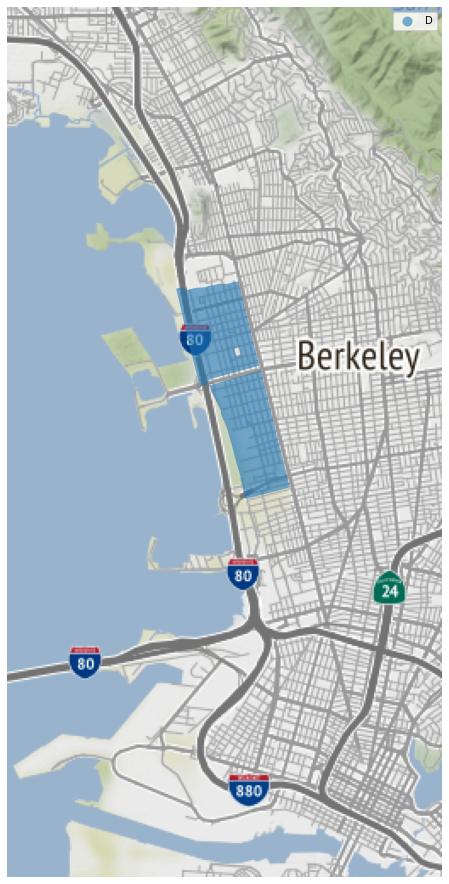

In [60]:
f, ax = plt.subplots(1, figsize=(16, 16))
# Display tile map
ax.imshow(img, extent=ext)
# Display airports on top
#ax.scatter(air.x, air.y, c='purple', s=2)
# Remove axis
oak_D3.plot(ax=ax, column='holc_grade', categorical=True, legend=True, alpha=.6)
ax.set_axis_off()
# Add title



Note: On the google maps it seems that this particular area not graded now a [James Kenney Community Center](https://goo.gl/maps/J6bfxw1rNDbuxAch8) and has green space.Interestingly, this area is left out from grade D while it seems that parts of interstate 80 has been graded as D as shown in the top polygon above.



For reference original HOLC map for Oakland


<img src="https://localwiki.org/media/cache/69/8e/698e61d98d2143f8304a38bc51710746.jpg" alt="OAKLAND"
	title="HOLC MAP" width="750" height="300"  /> 